In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('/Users/samue/My Python Stuff/train.csv')

In [3]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

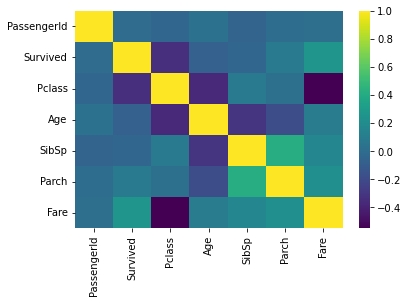

In [4]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap = "viridis")
plt.show

In [5]:
from sklearn.model_selection  import StratifiedShuffleSplit
split = StratifiedShuffleSplit (n_splits=1, test_size= 0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived','Pclass','Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

<function matplotlib.pyplot.show(close=None, block=None)>

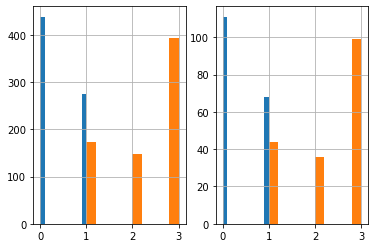

In [6]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show

In [7]:
 strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 6 to 302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          576 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
     
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [9]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female" , "Male"]
         
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [10]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1, errors="ignore")

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [12]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [13]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
6,7,0,1,54.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
237,238,1,2,8.0,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
144,145,0,2,18.0,0,0,11.5000,0.0,0.0,1.0,0.0,1.0
800,801,0,2,34.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
597,598,0,3,49.0,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
660,661,1,1,50.0,2,0,133.6500,0.0,0.0,1.0,0.0,1.0
879,880,1,1,56.0,0,1,83.1583,1.0,0.0,0.0,1.0,0.0
684,685,0,2,60.0,1,1,39.0000,0.0,0.0,1.0,0.0,1.0
651,652,1,2,18.0,0,1,23.0000,0.0,0.0,1.0,1.0,0.0


In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 6 to 302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
 from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(['Survived'],axis = 1)
Y = strat_train_set['Survived']
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_gird = [
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf,param_gird , cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [21]:
final_clf = grid_search.best_estimator_

In [22]:
final_clf

RandomForestClassifier(max_depth=10, n_estimators=10)

In [23]:
strat_test_set  = pipeline.fit_transform(strat_test_set)

In [26]:
X_test = strat_test_set.drop(['Survived'],axis = 1)
Y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [27]:
final_clf.score(X_data_test,Y_data_test)

0.8212290502793296

In [28]:
final_data = pipeline.fit_transform(titanic_data)

In [29]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [30]:
X_final = final_data.drop(['Survived'],axis=1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()


In [31]:
prod_clf = RandomForestClassifier()
param_gird = [
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf,param_gird , cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final,Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_

In [35]:
titanic_test_data = pd.read_csv("C:/Users/samue/My Python Stuff/test.csv")

In [37]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [38]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [41]:
predictions = prod_final_clf.predict(X_data_final_test)

In [43]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("C:/Users/samue/My Python Stuff/predictions.csv",index=False)

In [44]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
